In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [36]:
train_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [4]:
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

I WILL BE TAKING JUST 4 OR 5 COLUMNS HAVING HIGHEST CORRELATION AND NO CATEGORICAL DATA SO THAT OUR MAIN FOCUS BECOMES NEWTON'S ALGORITHM

In [5]:
train_data.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

In [6]:
select_cols = ['OverallQual','YearBuilt','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']
train_X_select = train_data[select_cols]
test_X_select = test_data[select_cols]
y_train = train_data['SalePrice']

In [7]:
train_X_select = np.array(train_X_select)
test_X_select = np.array(test_X_select)
y_train = np.array(y_train)
X_train = np.concatenate((np.ones((train_X_select.shape[0],1),dtype=int),train_X_select),axis=1)
print(X_train)
X_test = np.concatenate((np.ones((test_X_select.shape[0],1),dtype=int),test_X_select),axis=1)
y_train = y_train.reshape(X_train.shape[0],1)

[[   1    7 2003 ...    8    2  548]
 [   1    6 1976 ...    6    2  460]
 [   1    7 2001 ...    6    2  608]
 ...
 [   1    7 1941 ...    9    1  252]
 [   1    5 1950 ...    5    1  240]
 [   1    5 1965 ...    6    1  276]]


WE WILL BE CONSIDERING THAT OUR HYPOTHESIS IS X@W


In [37]:
def compute_cost(X,y,W):
    m = X_train.shape[0]
    return (0.5/m**2)*np.sum(np.square(y - X@W))   # i am not using any regularizing term here, if i do then gradients will change and hessian will also change

In [38]:
def grads(X,y,W): # remember this gradient we derive will be only for the above defined cost function
    m = X.shape[0]
    return (1/m**2)*(X.T)@(X@W - y)

In [39]:
def hessian(X): # i am giving input to be x only as it depends only on X
    m = X.shape[0]
    return (X.T@X)/m**2

In [40]:
def update(X,y,W):
    grad = grads(X,y,W)
    W = W - np.linalg.inv(hessian(X)) @ grad
    return W

In [42]:
costs =[]
W = np.random.randn(X_train.shape[1],1)*0.001
print("W  = ",W,"  cost  ",compute_cost(X_train,y_train,W))
costs.append(compute_cost(X_train,y_train, W))
costs.append(compute_cost(X_train,y_train,W))
for i in range(0,10): # newton's algorithm is very fast(hence for this cost function i am just taking 10 iterations), although it is computationally expensive to calculate inverse in each step
    W = update(X_train,y_train,W)
    print("W  = ",W,"  cost  ",compute_cost(X_train,y_train,W))
    costs.append(compute_cost(X_train,y_train,W))

W  =  [[-1.62720453e-03]
 [-1.43418769e-03]
 [ 9.84733735e-05]
 [-1.67122198e-03]
 [ 1.61328763e-04]
 [ 7.25261082e-05]
 [ 9.51036799e-04]
 [-2.16216721e-03]
 [-1.80803540e-03]
 [-1.95525544e-03]]   cost   13369923.38855417
W  =  [[-7.58532913e+05]
 [ 2.09227655e+04]
 [ 3.45362905e+02]
 [ 1.92465885e+01]
 [ 1.39481175e+01]
 [ 5.13679300e+01]
 [-5.41031135e+03]
 [-8.66391119e+01]
 [ 1.06342357e+04]
 [ 1.45088448e+01]]   cost   496114.1394037181
W  =  [[-7.58532913e+05]
 [ 2.09227655e+04]
 [ 3.45362905e+02]
 [ 1.92465885e+01]
 [ 1.39481175e+01]
 [ 5.13679300e+01]
 [-5.41031135e+03]
 [-8.66391119e+01]
 [ 1.06342357e+04]
 [ 1.45088448e+01]]   cost   496114.13940371806
W  =  [[-7.58532913e+05]
 [ 2.09227655e+04]
 [ 3.45362905e+02]
 [ 1.92465885e+01]
 [ 1.39481175e+01]
 [ 5.13679300e+01]
 [-5.41031135e+03]
 [-8.66391119e+01]
 [ 1.06342357e+04]
 [ 1.45088448e+01]]   cost   496114.1394037181
W  =  [[-7.58532913e+05]
 [ 2.09227655e+04]
 [ 3.45362905e+02]
 [ 1.92465885e+01]
 [ 1.39481175e+01]
 [

Text(0, 0.5, 'cost')

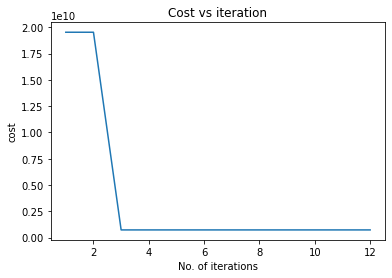

In [35]:
plt.plot(range(1, len(costs)+1),costs)
plt.title("Cost vs iteration")
plt.xlabel("No. of iterations")
plt.ylabel("cost")

## SO, THE CONCLUSION IS THAT 
> ###### 1.NEWTON'S ALGORITHM IS MUCH FASTER THAN GRADIENT DESCENT WHICH TAKES A LOT OF STEPS TO CONVERGE TO THIS MINIMUM.

> ###### 2.NEWTON'S ALGORITHM HAS A QUADRATIC CONVERGENCE(JUST A FACT), SINCE OUR COST FUNCTION WAS A QUADRATIC ONE, IT CONVERGED IN JUST A SINGLE STEP 

> ###### 3.BUT IT IS COMPUTATIONALLY MUCH EXPENSIVE

## PREDICTIONS

In [14]:
y_pred = X_test@W
y_pred

array([[114218.42677804],
       [164838.84101486],
       [167174.9585935 ],
       ...,
       [150105.65609336],
       [109023.13053693],
       [241765.58436227]])

In [15]:
final_dataset = pd.DataFrame(np.concatenate((X_test[:,1:],y_pred.reshape(X_test.shape[0],1)),axis=1))
final_dataset

0       1       2       3       4    5    6    7      8              9
0     5.0  1961.0   882.0   896.0   896.0  1.0  5.0  1.0  730.0  114218.426778
1     6.0  1958.0  1329.0  1329.0  1329.0  1.0  6.0  1.0  312.0  164838.841015
2     5.0  1997.0   928.0   928.0  1629.0  2.0  6.0  2.0  482.0  167174.958593
3     6.0  1998.0   926.0   926.0  1604.0  2.0  7.0  2.0  470.0  186831.754132
4     8.0  1992.0  1280.0  1280.0  1280.0  2.0  5.0  2.0  506.0  222408.421052
...   ...     ...     ...     ...     ...  ...  ...  ...    ...            ...
1454  4.0  1970.0   546.0   546.0  1092.0  1.0  5.0  0.0    0.0   73897.654413
1455  4.0  1970.0   546.0   546.0  1092.0  1.0  6.0  1.0  286.0   88594.780592
1456  5.0  1960.0  1224.0  1224.0  1224.0  1.0  7.0  2.0  576.0  150105.656093
1457  5.0  1992.0   912.0   970.0   970.0  1.0  6.0  0.0    0.0  109023.130537
1458  7.0  1993.0   996.0   996.0  2000.0  2.0  9.0  3.0  650.0  241765.584362

[1459 rows x 10 columns]

In [16]:
select_cols.append('SalesPrice')
select_cols

['OverallQual',
 'YearBuilt',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalesPrice']

In [17]:
final_dataset.columns = select_cols

In [18]:
final_dataset

OverallQual  YearBuilt  TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  \
0             5.0     1961.0        882.0     896.0      896.0       1.0   
1             6.0     1958.0       1329.0    1329.0     1329.0       1.0   
2             5.0     1997.0        928.0     928.0     1629.0       2.0   
3             6.0     1998.0        926.0     926.0     1604.0       2.0   
4             8.0     1992.0       1280.0    1280.0     1280.0       2.0   
...           ...        ...          ...       ...        ...       ...   
1454          4.0     1970.0        546.0     546.0     1092.0       1.0   
1455          4.0     1970.0        546.0     546.0     1092.0       1.0   
1456          5.0     1960.0       1224.0    1224.0     1224.0       1.0   
1457          5.0     1992.0        912.0     970.0      970.0       1.0   
1458          7.0     1993.0        996.0     996.0     2000.0       2.0   

      TotRmsAbvGrd  GarageCars  GarageArea     SalesPrice  
0              5.0         1.0       730.0  114218.426778  
1              6.0         1.0       312.0  164838.841015  
2              6.0         2.0       482.0  167174.958593  
3              7.0         2.0       470.0  186831.754132  
4              5.0         2.0       506.0  222408.421052  
...            ...         ...         ...            ...  
1454           5.0         0.0         0.0   73897.654413  
1455           6.0         1.0       286.0   88594.780592  
1456           7.0         2.0       576.0  150105.656093  
1457           6.0         0.0         0.0  109023.130537  
1458           9.0         3.0       650.0  241765.584362  

[1459 rows x 10 columns]

PREDICTIONS AREN'T GOOD ENOUGH(COSTS ARE HIGH, ALTHOUGH VERY LOW AS COMPARED TO THE INITIAL COST).

NOW HERE IS WHAT WE CAN DO TO IMPROVE OUR OVERALL PREDICATIONS:-
> 1. WE CAN TAKE MORE COLUMNS IN THE DATASET AND TRY OUT ONE HOT ENCODING FOR THE CATEGORICAL VARIABLES.

> 2. WE CAN ADD A REGULARIZING TERM IF THE DATA OVERFITS(BUT I DON'T THINK IT WILL BE THE CASE AS NUMBER OF PARAMETERS ARE ALREADY LOW). REMEMBER IF WE DO SO OUR GRADIENT AND HESSIAN FUNCTION WILL ALSO BE CHANGED

HERE ARE SOME RELATED CALCULATIONS

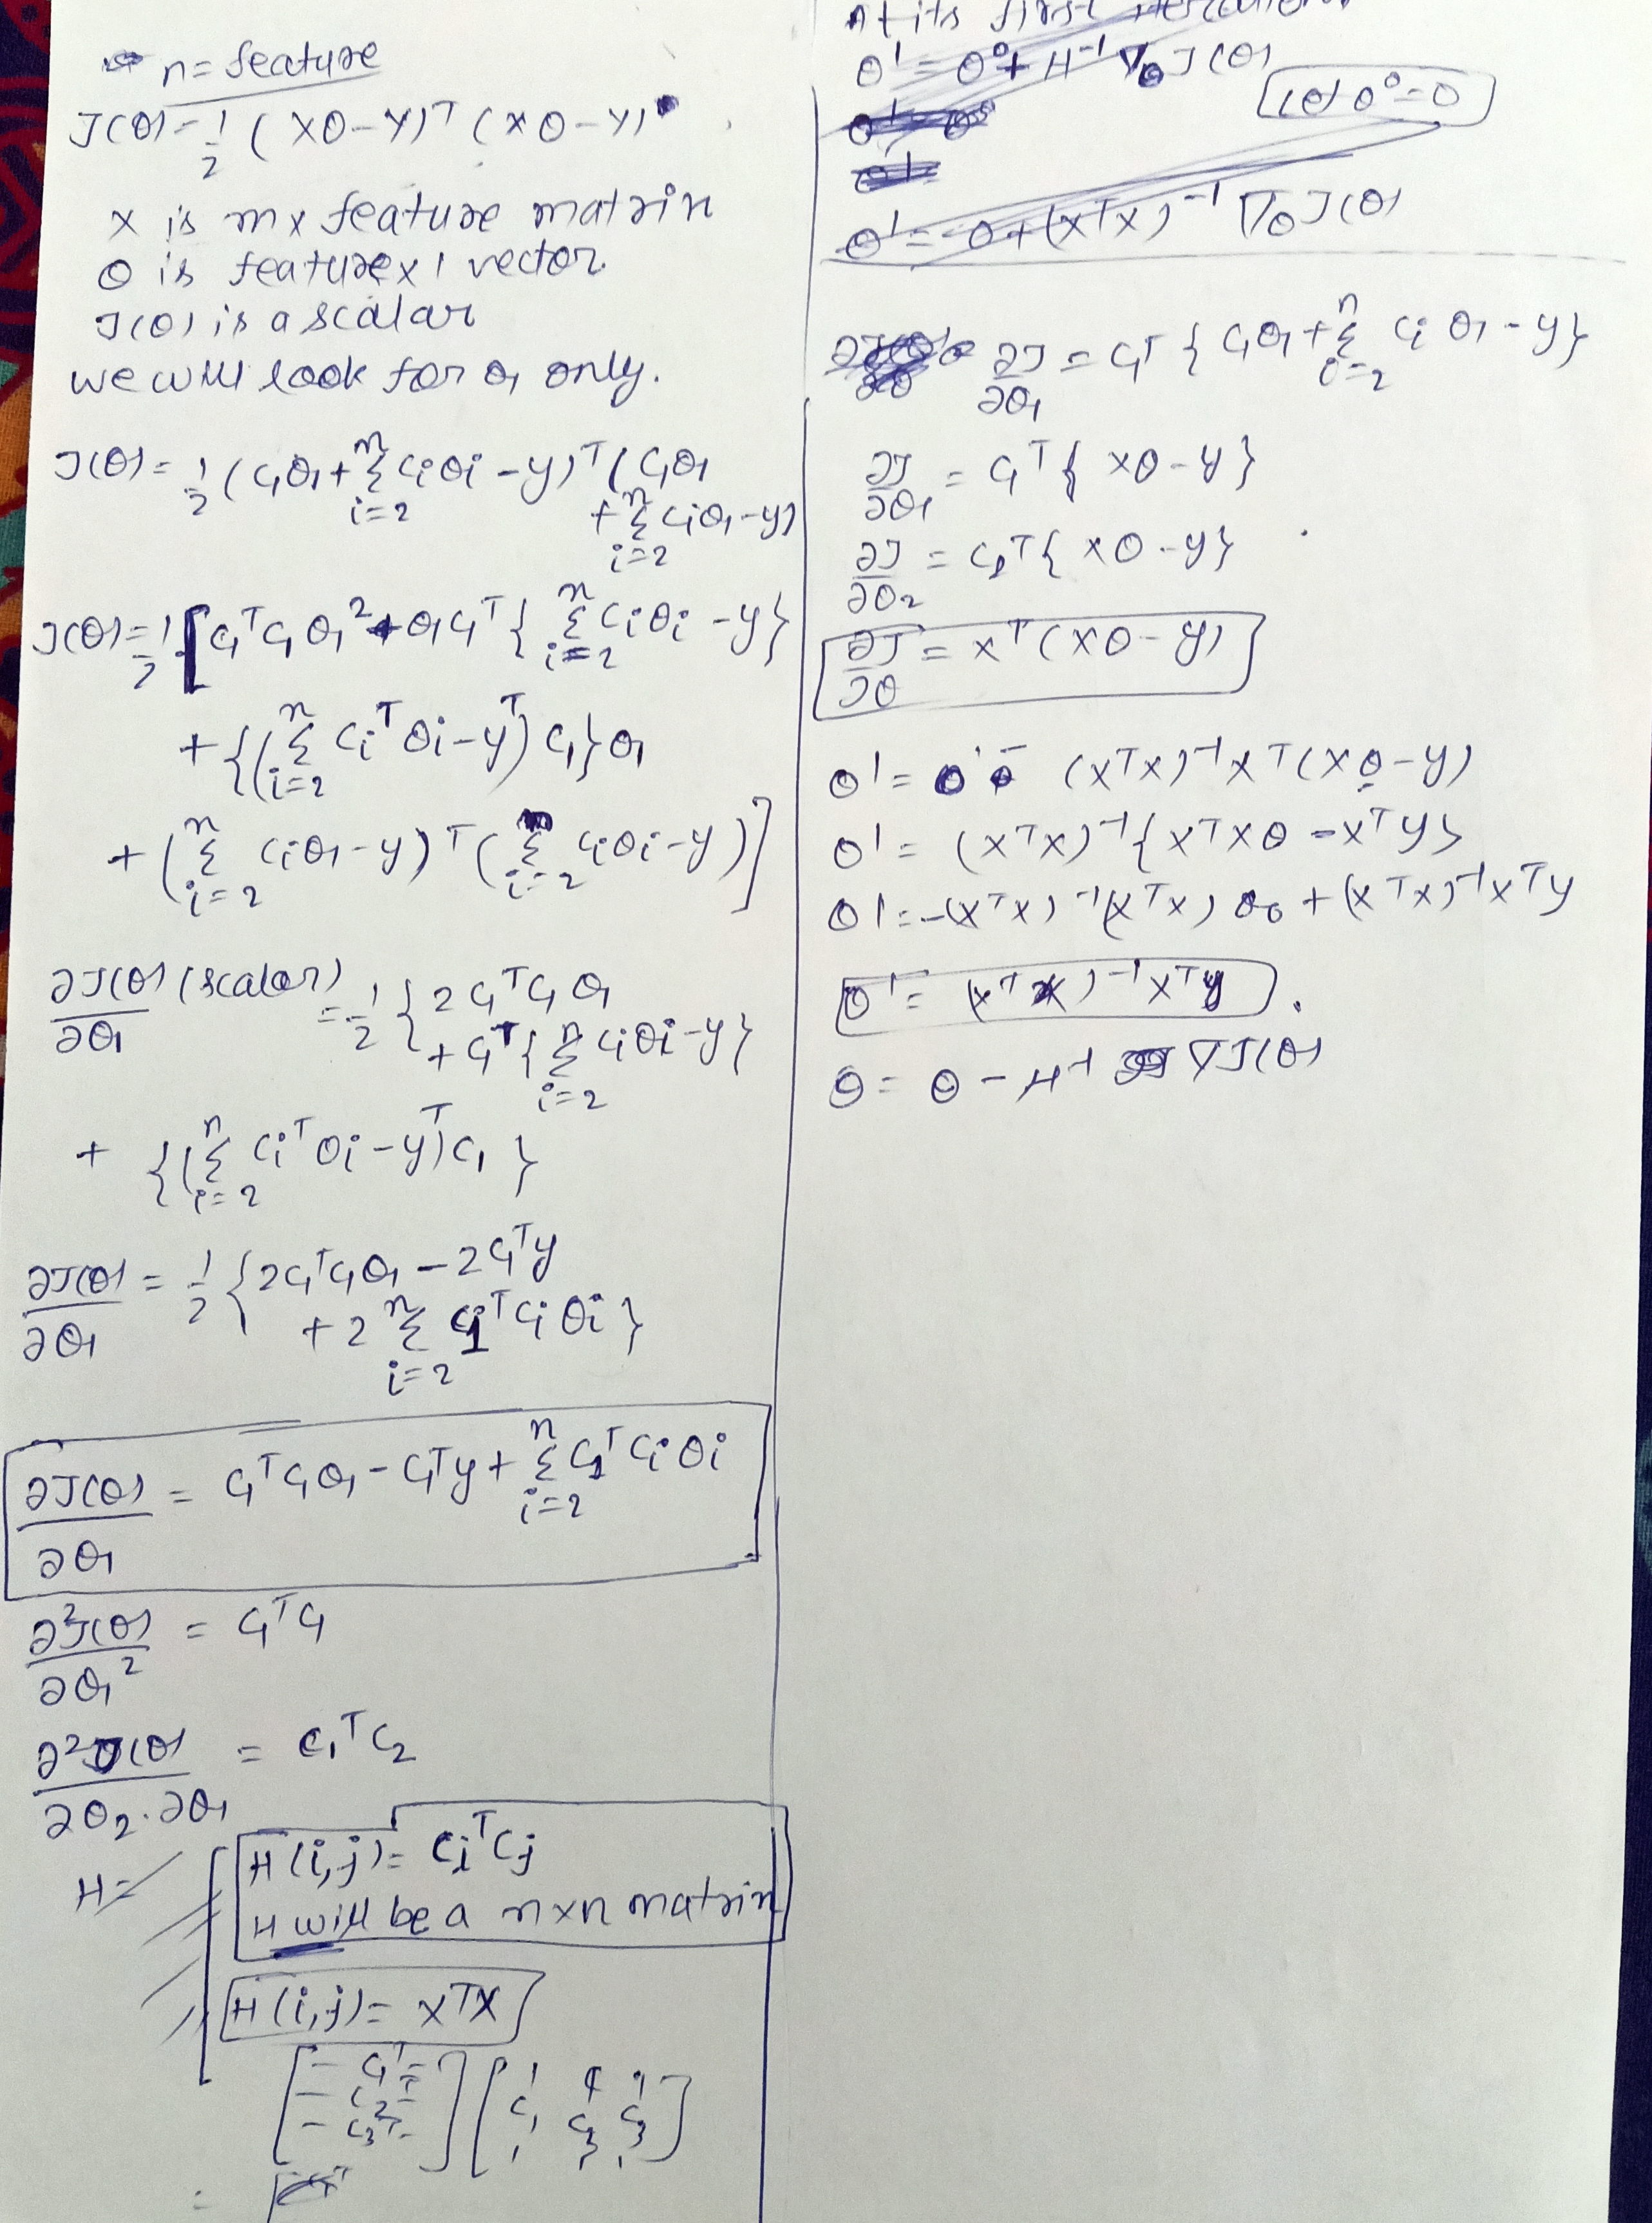